<a href="https://colab.research.google.com/github/leolani/cltl-face-all/blob/master/examples/colab/4.ERC-MELD-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We will train our simples models here together.

We'll start with the small pre-defined dataset

## Clone the repo, download the necessary files, etc.

In [2]:
%cd /content
!git clone https://github.com/leolani/cltl-face-all
!cd cltl-face-all/ && pip install .
!pip install omegaconf==2.0.5
!pip install tqdm av

# Download the annotations and stuff
!wget https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/train_sent_emo.csv
!wget https://raw.githubusercontent.com/leolani/cltl-face-all/master/examples/smaller-datasets-jsons/dataset-small.json
!wget https://raw.githubusercontent.com/leolani/cltl-face-all/master/examples/smaller-datasets-jsons/dataset-medium.json
!wget https://raw.githubusercontent.com/leolani/cltl-face-all/master/examples/smaller-datasets-jsons/dataset-large.json
!wget https://raw.githubusercontent.com/leolani/cltl-face-all/master/examples/smaller-datasets-jsons/datasets.json

!gdown --id 1-2LeHC_5Cm2gWWT6vBrVhp8jorbjkN1_
!unzip visual-features.zip
!rm visual-features.zip

!gdown --id 16ck7plW9v9eSHGCs5wuB2AhhufPRt3Wi
!unzip smaller-dataset.zip
!rm smaller-dataset.zip

!ls smaller-dataset/  |  wc -l
!ls visual-features | wc -l

/content
Cloning into 'cltl-face-all'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 448 (delta 51), reused 131 (delta 25), pack-reused 281
Receiving objects: 100% (448/448), 82.32 MiB | 31.60 MiB/s, done.
Resolving deltas: 100% (135/135), done.
Processing /content/cltl-face-all
  Created wheel for cltl-face-all: filename=cltl_face_all-0.0.0-cp36-none-any.whl size=53234 sha256=254fb5ac4ddb048d04272912c87a57066d6967cb6fe2c9317e3ae7eabdc1b802
  Stored in directory: /root/.cache/pip/wheels/8d/71/f3/2db0b17856a0b395aaa04c8562716e0350cfc712cdd4b9947e
Successfully built cltl-face-all
     |████████████████████████████████| 276kB 7.2MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=af46b22acd1802a260c62464d9a9689118575d31773ffa123c1d7c1119cde343
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae79

In [3]:
import json

with open('datasets.json', 'r') as stream:
    datasets = json.load(stream)

datasets = datasets['large']

## Randomly select a video and play it



In [4]:
from glob import glob
import random
import os
import json
import numpy as np
import av
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import HTML
from base64 import b64encode

VISUAL_FEATURES_PATH = 'visual-features/'
VIDEOS_PATH = "smaller-dataset/"

diautt = random.choice([foo for foo, bar in datasets['train'].items()])
annot = datasets['train'][diautt]
features_path = os.path.join(VISUAL_FEATURES_PATH, diautt) + '.npy'

features = np.load(features_path, allow_pickle=True)
# below line is necessary since the saved file is actually a dictionary.
features = features.item()

vid_path = os.path.join(VIDEOS_PATH, diautt) +  '.mp4'
container = av.open(vid_path)

print(vid_path)
print(annot)

frames = {}
for idx, frame in enumerate(container.decode(video=0)):
    numpy_RGB = np.array(frame.to_image())
    frames[idx] = numpy_RGB

assert np.abs(len(frames) - len(features)) <= 1

mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=1280 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

smaller-dataset/dia293_utt12.mp4
{'SrNo': '2920', 'Utterance': '"You wish."', 'Speaker': 'Phoebe', 'Emotion': 'joy', 'Sentiment': 'positive', 'Dialogue_ID': '293', 'Utterance_ID': '12', 'Season': '6', 'Episode': '21', 'StartTime': '0:13:31,701', 'EndTime': '0:13:32,736'}


## Randomly select a frame and check it

23


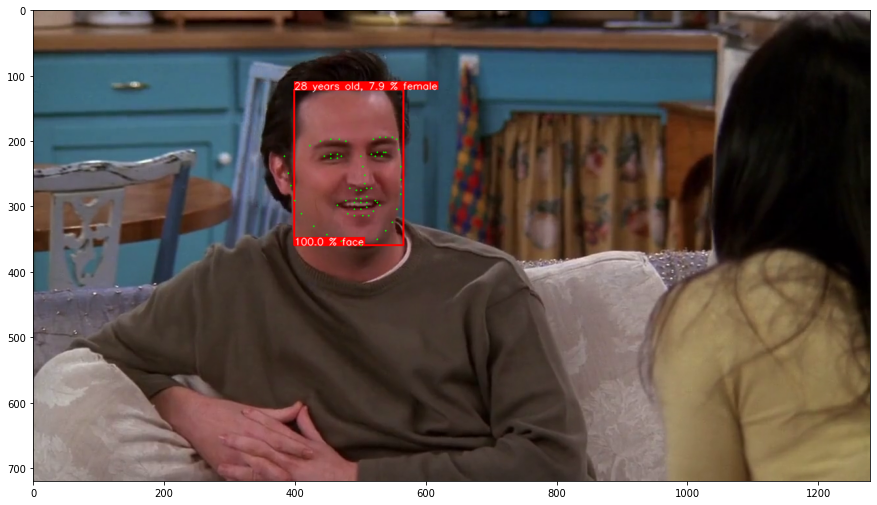

SrNo 	 2920
Utterance 	 "You wish."
Speaker 	 Phoebe
Emotion 	 joy
Sentiment 	 positive
Dialogue_ID 	 293
Utterance_ID 	 12
Season 	 6
Episode 	 21
StartTime 	 0:13:31,701
EndTime 	 0:13:32,736


In [5]:
def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=0.8, thickness=1):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)
    
idx = random.choice(list(frames.keys()))
img = frames[idx]
print(idx)

feature = features[idx]

for feat in feature:
    bbox = feat['bbox']
    landmark = feat['landmark']
    age = feat['age']
    gender = feat['gender']
    embedding = feat['embedding']
    # face = feat['face']

    x1, y1, x2, y2, prob = bbox
    
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    label = f"{str(round(prob*100, 1))} % face"
    draw_label(img, (x1, y2), label, font_scale=0.5, thickness=1)

    for lm in landmark:
        cv2.circle(img, (int(lm[0]), int(lm[1])), 1, (0,255,0), -1)

    label = f"{int(age)} years old, {str(round(gender*100, 1))} % female"
    draw_label(img, (x1, y1), label, font_scale=0.5, thickness=1)
    
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

for key, val in annot.items():
    print(key, '\t', val)

## The datasets structure

It comes with three different sizes.

In [6]:
datasets.keys()

dict_keys(['train', 'dev', 'test'])

In [7]:
for key, val in datasets.items():
    print(key, len(val))

train 584
dev 97
test 108


## Let's see how the data actually looks like

run the below cell.

In [8]:
datasets['train']['dia1000_utt0']

{'Dialogue_ID': '1000',
 'Emotion': 'disgust',
 'EndTime': '00:06:49,783',
 'Episode': '3',
 'Season': '2',
 'Sentiment': 'negative',
 'Speaker': 'Monica',
 'SrNo': '10029',
 'StartTime': '00:06:45,780',
 'Utterance': 'Would you look at this dump? He hated us. This is his final revenge!',
 'Utterance_ID': '0'}

## Let's check out the data distributions.

In [9]:
import numpy as np
from tqdm.notebook import tqdm
from collections import Counter

def count2ratio(counts):
    total_counts = sum([val for key, val in counts.items()])

    return {key: round(val/total_counts, 3) for key, val in counts.items()}

for key, val in datasets.items():
    sentiments = []
    emotions = []
    speakers = []

    for diautt, annot in val.items():
        sentiments.append(annot['Sentiment'])
        emotions.append(annot['Emotion'])
        speakers.append(annot['Speaker'])

    sentiments = dict(Counter(sentiments))
    emotions = dict(Counter(emotions))
    speakers = dict(Counter(speakers))

    sentiments = count2ratio(sentiments)
    emotions = count2ratio(emotions)
    speakers = count2ratio(speakers)

    print(key, 'sentiments', sentiments)
    print(key, 'emotions', emotions)
    print(key, 'speakers', sentiments)
    print()

train sentiments {'negative': 0.274, 'neutral': 0.473, 'positive': 0.253}
train emotions {'disgust': 0.026, 'anger': 0.091, 'neutral': 0.473, 'sadness': 0.082, 'joy': 0.182, 'surprise': 0.125, 'fear': 0.022}
train speakers {'negative': 0.274, 'neutral': 0.473, 'positive': 0.253}

dev sentiments {'positive': 0.206, 'neutral': 0.557, 'negative': 0.237}
dev emotions {'surprise': 0.072, 'neutral': 0.557, 'joy': 0.175, 'disgust': 0.052, 'anger': 0.072, 'fear': 0.021, 'sadness': 0.052}
dev speakers {'positive': 0.206, 'neutral': 0.557, 'negative': 0.237}

test sentiments {'negative': 0.259, 'neutral': 0.509, 'positive': 0.231}
test emotions {'surprise': 0.167, 'neutral': 0.509, 'anger': 0.056, 'sadness': 0.12, 'joy': 0.13, 'fear': 0.009, 'disgust': 0.009}
test speakers {'negative': 0.259, 'neutral': 0.509, 'positive': 0.231}



When it comes to the emotion classes, you can see that the label `neutral` accounts for nearly half of the instances. **This means that if your emotion classifier performs less than the accuracy of 50%, you are doing something wrong.**



## TODO1:

Extract viasual features or train a classifier. Each video (utterance) should result in a fixed-size vector. This should be done by Tae and Wes.

In [10]:
import os
from glob import glob
import numpy as np
from cltl_face_all.arcface import calc_angle_distance
from tqdm.notebook import tqdm


predefined_faces_= glob(os.path.join('./cltl-face-all/your-faces/*/*.npy'))
predefined_faces = {}

for path in predefined_faces_:
    name = path.split('/')[-2]
    predefined_faces[name] = np.load(path)

vecs = {}
THRESHOLDS = {'face': 0.9, 'angle': 1.15}

for DATASET in tqdm(['train', 'dev', 'test']):
    vecs[DATASET] = {}
    for diautt, annot in datasets[DATASET].items():
        vecs[DATASET][diautt] = {}
        speaker = annot['Speaker']

        visual_features = np.load(f'visual-features/{diautt}.npy', \
                                    allow_pickle=True).item()

        for frame, features in visual_features.items():
            vecs[DATASET][diautt][frame] = None
            # Assume that there is only one unique face per frame.
            for feat in features:
                age = feat['age']
                gender = feat['gender']
                bbox = feat['bbox']
                embedding = feat['embedding']
                landmark = feat['landmark']

                if bbox[-1] < THRESHOLDS['face']:
                    continue

                if speaker not in list(predefined_faces.keys()):
                    continue

                embedding.reshape(1, 512)

                dists = {key: calc_angle_distance(embedding, val) for key, val \
                            in predefined_faces.items()}

                if dists[speaker] < THRESHOLDS['angle']:
                    vecs[DATASET][diautt][frame] = landmark


In [11]:
vecs_with_speaker = {}

for DATASET in tqdm(['train', 'dev', 'test']):
    vecs_with_speaker[DATASET] = {}

    print(f"{len(vecs[DATASET])} videos in {DATASET}")
    for diautt, frame_landmarks in vecs[DATASET].items():
        with_speaker = [lm for lm in frame_landmarks.values() if lm is not None]
        if len(with_speaker) > 0:
            vecs_with_speaker[DATASET][diautt] = with_speaker

    print(f"{len(vecs_with_speaker[DATASET])} videos in {DATASET}, after removing the utterances without the speaker face")
    print(f"the ratio is {len(vecs_with_speaker[DATASET]) / len(vecs[DATASET])}")
    print()

584 videos in train
517 videos in train, after removing the utterances without the speaker face
the ratio is 0.8852739726027398

97 videos in dev
81 videos in dev, after removing the utterances without the speaker face
the ratio is 0.8350515463917526

108 videos in test
94 videos in test, after removing the utterances without the speaker face
the ratio is 0.8703703703703703




In [13]:
X = {}
y = {}
emotion2num = {'anger': 0,
               'disgust': 1,
               'fear': 2,
               'joy': 3,
               'neutral': 4,
               'sadness': 5, 
               'surprise': 6}
num2onehot = {0: np.array([1, 0, 0, 0, 0, 0, 0]),
              1: np.array([0, 1, 0, 0, 0, 0, 0]),
              2: np.array([0, 0, 1, 0, 0, 0, 0]),
              3: np.array([0, 0, 0, 1, 0, 0, 0]),
              4: np.array([0, 0, 0, 0, 1, 0, 0]),
              5: np.array([0, 0, 0, 0, 0, 1, 0]),
              6: np.array([0, 0, 0, 0, 0, 0, 1])}

for DATATYPE in ['train', 'dev', 'test']:
    X[DATATYPE] = []
    y[DATATYPE] = []
    for diautt, landmarks in vecs_with_speaker[DATATYPE].items():
        label = datasets[DATATYPE][diautt]['Emotion']
        X[DATATYPE].append(landmarks)
        y[DATATYPE].append(num2onehot[emotion2num[label]])


In [14]:
import pickle

with open('compact-visual.pkl', 'wb') as stream:
    pickle.dump({'X': X, 'y': y}, stream)

In [15]:
len(X['train']), len(X['train'][0]), X['train'][0][0].shape, y['train'][0]

(517, 9, (68, 2), array([0, 1, 0, 0, 0, 0, 0]))

## TODO2:

Extract text features  or train a classifier. Each video (utterance) should result in a fixed-size vector. This should be done by Nihat and Zeynep.

In [ ]:
#DO IT

## TODO3:

Extract audio features  or train a classifier. Each video (utterance) should result in a fixed-size vector. This should be done by Vivian.

In [ ]:
#DO IT

## TOOD4:

Concatenate the three feature vectors and/or train a simple classifier. Start simple (e.g. one-layered logistic regression). This should be done all together.

In [ ]:
#DO IT